## **Vanishing Gradient Problem**
In this scenario of hackerrank, you will be exploring the problem of **Vanishing Gradient** and the ways of overcoming.

We will try solving the problem with 
1. SLP, 
2. MLP with Tanh
3. MLP with Relu and He initialisation

Decide the best model to overcome the problem of Vanishing Gradient

**Import the packages**

In [1]:
from sklearn.datasets import make_circles,make_moons
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from numpy import where
from matplotlib import pyplot
import numpy as np

Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

**Function to plot the Decsion Boundary**

In [3]:
import numpy as np
def plot_decision_boundary(X, y, model, steps=500, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

**Generate the Dataset**

Now generate a random dataset with *make_circles* function of sklearn datasets with the parameters


1.   Number of samples =1000
2.   Noise=0.1
3.   Random state=1











In [4]:
# generate circles
X, y = make_circles(1000,0.1,1)

**Plot the Dataset**

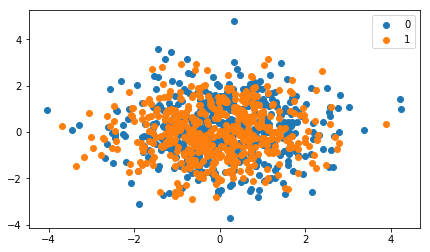

In [5]:
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

**Scaling the Features**

Scale the input features of X to be in range between -1 and 1 using MinMax scaler

In [6]:
# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

**Split the Dataset**

In [7]:
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [8]:
trainX.shape

(500, 2)

---------------------------------------------------------------------------
## **1.SHALLOW MODEL**
-------------------------------------------------------------------
Construct a fully-connected network structure defined using dense class

       
    1.Create a sequential model
    2.Use the init defined as Kernel_initializer
    3.The model expects rows of data with 2 variables (the input_dim=2 argument)
    4.The first hidden layer has 5 nodes and uses the tanh activation function.
    5.The second hidden layer has 1 node and uses the sigmoid activation function.
   


In [9]:
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation="tanh", kernel_initializer=init))
model.add(Dense(1,activation="sigmoid", kernel_initializer=init))

**Compile the model**

Compile the model with the parameters

    1.Loss= Binary cross entropy
    2.Optimizer with the defined SGD optimizer
    3.Metrics as accuracy








In [10]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


**Fit the model**

Fit the model with the parameters epochs=500

    







In [11]:
# fit model
history = model.fit(trainX,trainy, epochs=500)

Epoch 1/500
500/500 [==============================] - 0s 179us/step - loss: 0.7252 - accuracy: 0.4820
Epoch 2/500
500/500 [==============================] - 0s 41us/step - loss: 0.7180 - accuracy: 0.4780
Epoch 3/500
500/500 [==============================] - 0s 45us/step - loss: 0.7127 - accuracy: 0.4960
Epoch 4/500
500/500 [==============================] - 0s 42us/step - loss: 0.7084 - accuracy: 0.5080
Epoch 5/500
500/500 [==============================] - 0s 121us/step - loss: 0.7061 - accuracy: 0.5120
Epoch 6/500
500/500 [==============================] - 0s 43us/step - loss: 0.7037 - accuracy: 0.5060
Epoch 7/500
500/500 [==============================] - 0s 111us/step - loss: 0.7020 - accuracy: 0.5120
Epoch 8/500
500/500 [==============================] - 0s 42us/step - loss: 0.7002 - accuracy: 0.5180
Epoch 9/500
500/500 [==============================] - 0s 41us/step - loss: 0.6995 - accuracy: 0.5100
Epoch 10/500
500/500 [==============================] - 0s 110us/step - loss: 0

**Evaluate the model**

Evaluate the model and print the training accuracy and testing Accuracy

In [12]:
# evaluate the model
_, train_acc = model.evaluate(trainX,trainy)
_, test_acc = model.evaluate(testX,testy)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

500/500 [==============================] - 0s 22us/step
Train: 0.534, Test: 0.518


In [13]:
model.metrics_names

['loss', 'accuracy']

**Plotting and Inferences**

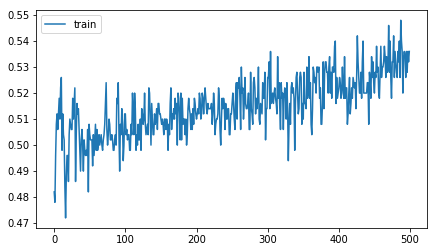

'\nInference: \nPlot will show that the learning becomes slow after 300 epochs due to vanishing gradients\n\n'

In [14]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
#pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

'''
Inference: 
Plot will show that the learning becomes slow after 300 epochs due to vanishing gradients

'''

In [15]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


(<Figure size 504x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff0a45687b8>)

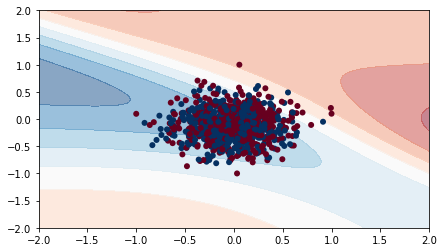

In [16]:
plot_decision_boundary(X, y, model,cmap="RdBu")


---------------------------------------------------------------------------
## **2.DEEP MODEL**
-------------------------------------------------------------------
Construct a fully-connected network structure defined using dense class

       
    1.Create a sequential model
    2.Use the init defined as Kernel_initializer
    3.The model expects rows of data with 2 variables (the input_dim=2 argument)
    4.The first hidden layer has 5 nodes and uses the tanh activation function.
    5.The second hidden layer has 5 nodes and uses the tanh activation function.
    6.The third hidden layer has 5 nodes and uses the tanh activation function.
    7.The fourth hidden layer has 5 nodes and uses the tanh activation function.
    8.The fifth hidden layer has 5 nodes and uses the tanh activation function.
    9.The sixth hidden layer has 1 node and uses the sigmoid activation function.
   


In [17]:
# define model
init = RandomUniform(minval=0, maxval=1)
model1 = Sequential()
model1.add(Dense(5, input_dim=2, activation="tanh", kernel_initializer=init))
model1.add(Dense(5, activation="tanh", kernel_initializer=init))
model1.add(Dense(5, activation="tanh", kernel_initializer=init))
model1.add(Dense(5, activation="tanh",kernel_initializer=init))
model1.add(Dense(5, activation="tanh", kernel_initializer=init))
model1.add(Dense(1, activation="sigmoid", kernel_initializer=init))


**Compile the Deep model**

Compile the model with the parameters

    1.Loss= Binary cross entropy
    2.Optimizer with the defined SGD optimizer
    3.Metrics as accuracy








In [18]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

**Fit the model**

Fit the model with the parameters epochs=500

In [19]:
# fit model
history = model1.fit(trainX,trainy,epochs=500)

Epoch 1/500
500/500 [==============================] - 0s 264us/step - loss: 0.9601 - accuracy: 0.4880
Epoch 2/500
500/500 [==============================] - 0s 63us/step - loss: 0.7047 - accuracy: 0.4980
Epoch 3/500
500/500 [==============================] - 0s 56us/step - loss: 0.7063 - accuracy: 0.4860
Epoch 4/500
500/500 [==============================] - 0s 146us/step - loss: 0.6966 - accuracy: 0.4860
Epoch 5/500
500/500 [==============================] - 0s 157us/step - loss: 0.6936 - accuracy: 0.5200
Epoch 6/500
500/500 [==============================] - 0s 58us/step - loss: 0.6938 - accuracy: 0.4920
Epoch 7/500
500/500 [==============================] - 0s 145us/step - loss: 0.6950 - accuracy: 0.4900
Epoch 8/500
500/500 [==============================] - 0s 50us/step - loss: 0.6964 - accuracy: 0.4700
Epoch 9/500
500/500 [==============================] - 0s 132us/step - loss: 0.6923 - accuracy: 0.5080
Epoch 10/500
500/500 [==============================] - 0s 51us/step - loss: 

**Evaluate the model**

Evaluate the model and print the training accuracy and testing Accuracy

In [20]:
# evaluate the model
_, train_acc = model1.evaluate(trainX,trainy)
_, test_acc = model1.evaluate(testX,testy)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

500/500 [==============================] - 0s 25us/step
Train: 0.528, Test: 0.476


**Plotting and Inferences**

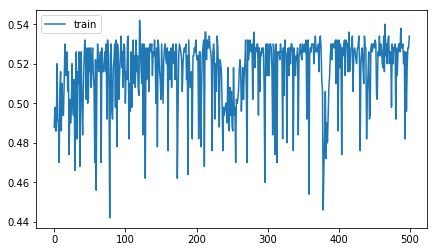

'\nInference: \n1.Performance is quite poor on both the train and test sets achieving around 50% accuracy. \n\n2.This suggests that the model as configured could not learn the problem nor generalize a solution.\n\n'

In [21]:
pyplot.plot(history.history['accuracy'], label='train')
#pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

'''
Inference: 
1.Performance is quite poor on both the train and test sets achieving around 50% accuracy. 

2.This suggests that the model as configured could not learn the problem nor generalize a solution.

'''

---------------------------------------------------------------------------
## **3.DEEP MODEL with He initialization and ReLU**
-------------------------------------------------------------------
Construct a fully-connected network structure defined using dense class

       
    1.Create a sequential model
    2.Use **he_uniform** as Kernel Initializer for all layers
    3.The model expects rows of data with 2 variables (the input_dim=2 argument)
    4.The first hidden layer has 5 nodes and uses the relu activation function.
    5.The second hidden layer has 5 nodes and uses the relu activation function.
    6.The third hidden layer has 5 nodes and uses the relu activation function.
    7.The fourth hidden layer has 5 nodes and uses the relu activation function.
    8.The fifth hidden layer has 5 nodes and uses the relu activation function.
    9.The sixth hidden layer has 1 node and uses the sigmoid activation function.
   




In [22]:
# define model
model2 = Sequential()
model2.add(Dense(5, input_dim=2, activation="relu", kernel_initializer="he_uniform"))
model2.add(Dense(5, activation="relu", kernel_initializer="he_uniform"))
model2.add(Dense(5, activation="relu", kernel_initializer="he_uniform"))
model2.add(Dense(5, activation="relu", kernel_initializer="he_uniform"))
model2.add(Dense(5, activation="relu", kernel_initializer="he_uniform"))
model2.add(Dense(1, activation="sigmoid", kernel_initializer="he_uniform"))


**Compile the Deep model**

Compile the model with the parameters

    1.Loss= Binary cross entropy
    2.Optimizer with the defined SGD optimizer
    3.Metrics as accuracy








In [23]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model2.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

**Fit the model**

Fit the model with the parameters epochs=500

In [24]:
# fit model
history = model2.fit(trainX, trainy, epochs=500)

Epoch 1/500
500/500 [==============================] - 0s 271us/step - loss: 0.6935 - accuracy: 0.4760
Epoch 2/500
500/500 [==============================] - 0s 149us/step - loss: 0.6928 - accuracy: 0.5040
Epoch 3/500
500/500 [==============================] - 0s 58us/step - loss: 0.6928 - accuracy: 0.4900
Epoch 4/500
500/500 [==============================] - 0s 151us/step - loss: 0.6927 - accuracy: 0.5120
Epoch 5/500
500/500 [==============================] - 0s 58us/step - loss: 0.6928 - accuracy: 0.5120
Epoch 6/500
500/500 [==============================] - 0s 151us/step - loss: 0.6926 - accuracy: 0.5120
Epoch 7/500
500/500 [==============================] - 0s 54us/step - loss: 0.6930 - accuracy: 0.5140
Epoch 8/500
500/500 [==============================] - 0s 144us/step - loss: 0.6925 - accuracy: 0.5380
Epoch 9/500
500/500 [==============================] - 0s 48us/step - loss: 0.6929 - accuracy: 0.5380
Epoch 10/500
500/500 [==============================] - 0s 138us/step - loss:

**Evaluate the model**

Evaluate the model and print the training accuracy and testing Accuracy

In [25]:
# evaluate the model
_, train_acc = model2.evaluate(trainX,trainy)
_, test_acc = model2.evaluate(testX,testy)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

500/500 [==============================] - 0s 27us/step
Train: 0.582, Test: 0.506


**Plotting and Inferences**

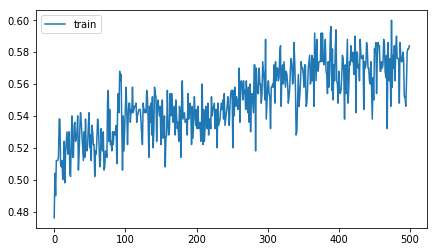

'\nInference\n\nSmall change has allowed the model to learn the problem, achieving more accuracy on both datasets, outperforming the single layer model using the tanh activation function.\n'

In [26]:
pyplot.plot(history.history['accuracy'], label='train')
#pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

'''
Inference

Small change has allowed the model to learn the problem, achieving more accuracy on both datasets, outperforming the single layer model using the tanh activation function.
'''

(<Figure size 504x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff074638198>)

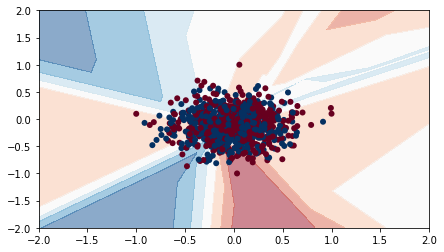

In [27]:
plot_decision_boundary(X, y, model2,cmap="RdBu")


## Save your models for testing

In [28]:
model.save("model.h5")#shallow
model1.save("model1.h5")#Deep
model2.save("model2.h5")#Deep with He and Relu
